In [133]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import spacy
import re
import spacy.lang.ru
from spacy.lang.ru.stop_words import STOP_WORDS
from spacy.cli import download
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pymorphy2
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import transformers
from transformers import BertModel
from transformers.models.bert.tokenization_bert import BertTokenizer
from pathlib import Path
import torch

2023-04-09 11:22:44.290909: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/cuda/lib64
2023-04-09 11:22:44.290943: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-09 11:22:44.290964: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (s-c73e44f6-a48c-4ed3-aa95-17cd95e777bd): /proc/driver/nvidia/version does not exist


In [38]:
#!g2.2
#%pip install seaborn

In [39]:
#%pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.5.0/ru_core_news_sm-3.5.0-py3-none-any.whl

–ü–†–ï–î–û–ë–†–ê–ë–û–¢–ö–ê –î–ê–ù–ù–´–•

In [41]:
df = pd.read_csv('/home/jupyter/mnt/s3/hsedatafitpredict1392/train.csv', index_col=0)
df

sentence  ... sentiment
4754        –ü—Ä–∏ —ç—Ç–æ–º –≤—Å–µ–≥–¥–∞ –ø–æ–ª—É—á–∞–ª –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ —É—Å–ª—É–≥–∏.  ...         +
4417   –ù–µ –≤–∏–∂—É, –∑–∞ —á—Ç–æ —Ö–æ—Ç—è –±—ã 2 –ø–æ—Å—Ç–∞–≤–∏—Ç—å, —Å–µ—Ä–≤–∏—Å –Ω–∞ 1!  ...         ‚àí
3629        –í–æ—Ç —Ç–∞–∫ "–ú–æ–π –ª—é–±–∏–º—ã–π" –±–∞–Ω–∫ –ú–ö–ë –º–µ–Ω—è –æ–±–º–∞–Ω—É–ª.  ...         ‚àí
11640               –û—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –∫–ª–∏–µ–Ω—Ç–∞–º.  ...         ‚àí
5571   –í—Å–µ–≥–¥–∞ –≤ –ª—é–±–æ–µ –≤—Ä–µ–º—è –¥–Ω—è –∏ –Ω–æ—á–∏ –ø–æ–º–æ–≥—É—Ç, –æ—Ç–≤–µ—Ç...  ...         +
...                                                  ...  ...       ...
8004   –ù–∏–∫–æ–≥–¥–∞ –∏ –Ω–∏ –≤ –∫–æ–µ–º —Å–ª—É—á–∞–µ –Ω–µ –æ—Ç–∫—Ä—ã–≤–∞–π—Ç–µ —Å—á–µ—Ç ...  ...         ‚àí
18182  –¢–ò –æ—Ç–∫—Ä–æ–≤–µ–Ω–Ω–æ –∑–∞–±–∏–ª–∏ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –∏ —Ä–∞–∑–≤–∏–≤–∞—é—Ç —Å...  ...         ‚àí
744    –Ø —Å—á–∏—Ç–∞—é, —ç—Ç–æ –ø—Ä–æ—Ä—ã–≤ –∏ –ª–∏–¥–µ—Ä—Å—Ç–≤–æ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö —É—Å...  ...         +
6220   –ü–∏—Å–∞–ª –º—É–∂—á–∏–Ω–∞ –æ—á–µ–Ω—å –¥–æ—Ö–æ–¥—á–∏–≤–æ, –Ω–µ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–º —è...  ...         +
8433   –î–∞–Ω–Ω–∞—è —Å–∏—Ç—É–∞—Ü–∏—è –º–µ–Ω—è —Å–∏–ª—å–Ω–æ –≤—ã–±–∏–ª–∞ –∏–∑ –∫–æ–ª–µ–∏, –∏...  ...         ‚àí

[19361 rows x 4 columns]

In [74]:
def dis(dataframe):
    display(dataframe.shape, dataframe.head(4), dataframe.tail(4))
    return None

# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –Ω—É–∂–Ω–æ–≥–æ –Ω–∞–º –æ–∫—Ä—É–≥–ª–µ–Ω–∏—è —Å —Ç—Ä–µ—à—Ö–æ–ª–¥–æ–º
def my_round(x, tr_hold=0.5):
    if x >= tr_hold:
        return 1
    if x <= -tr_hold:
        return -1
    return 0

#TF_IDF + lemmatization
def punctuation(line):
    return re.sub(r'[.,!?\'\"]', '', line)

def removing_stopwords(line):
    text_tokens = word_tokenize(line)
    remove_sw = [word for word in text_tokens if not word in stopwords.words()]
    res = ''
    for i in range(len(remove_sw)):
        res += ''.join(remove_sw[i]) + ' '
    return res[:-1]

def extract_keywords(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    text = ' '.join(text.strip().split())
    doc = nlp(text)
    stop_words = spacy.lang.ru.stop_words.STOP_WORDS
    date_names = set(['—è–Ω–≤–∞—Ä—å', '—Ñ–µ–≤—Ä–∞–ª—å', '–º–∞—Ä—Ç', '–∞–ø—Ä–µ–ª—å', '–º–∞–π', '–∏—é–Ω—å', '–∏—é–ª—å', '–∞–≤–≥—É—Å—Ç', '—Å–µ–Ω—Ç—è–±—Ä—å', '–æ–∫—Ç—è–±—Ä—å', '–Ω–æ—è–±—Ä—å', '–¥–µ–∫–∞–±—Ä—å',
                  '–ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫', '–≤—Ç–æ—Ä–Ω–∏–∫', '—Å—Ä–µ–¥–∞', '—á–µ—Ç–≤–µ—Ä–≥', '–ø—è—Ç–Ω–∏—Ü–∞', '—Å—É–±–±–æ—Ç–∞', '–≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ'])
    for word in date_names:
        stop_words.add(word.lower())
    lemmas = [token.lemma_ for token in doc if ((not token.is_stop) and token.lemma_ not in stop_words)]
    lemmi = list(set(lemmas))
    res =''
    for i in range(0, len(lemmi)):
        res += ''.join(lemmi[i]) + ' '
    return res[:-1]

# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

morph = pymorphy2.MorphAnalyzer()
def lemmatization(line):
    text_tokens = word_tokenize(line)
    remove_sw = [word for word in text_tokens if not word in stopwords.words()]
    res = ''
    for i in range(0, len(remove_sw)):
        elem = morph.parse(remove_sw[i])[0][2]
        res += ''.join(elem) + ' '
    return res[:-1]

In [51]:
def extract_keywords(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    doc = nlp(text)
    stop_words = spacy.lang.ru.stop_words.STOP_WORDS
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    return list(set(lemmas))

In [44]:
#!c1.32
# –∫–æ–¥–∏—Ä—É–µ–º —Ç–∞—Ä–≥–µ—Ç (sentiment)
df.sentiment = df.sentiment.apply(lambda x: 1 if x == "+" else (0 if x == "?" else -1))

# –º–µ–Ω—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–∞—Ç–µ–≥–æ—Ä—è—Ö –Ω–∞ —É–¥–æ–±–Ω—ã–µ
df['1category'].replace('?', 'not def', inplace=True)
df['2category'].fillna('-', inplace=True)
dis(df)

(19361, 4)

sentence  ... sentiment
4754        –ü—Ä–∏ —ç—Ç–æ–º –≤—Å–µ–≥–¥–∞ –ø–æ–ª—É—á–∞–ª –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ —É—Å–ª—É–≥–∏.  ...         1
4417   –ù–µ –≤–∏–∂—É, –∑–∞ —á—Ç–æ —Ö–æ—Ç—è –±—ã 2 –ø–æ—Å—Ç–∞–≤–∏—Ç—å, —Å–µ—Ä–≤–∏—Å –Ω–∞ 1!  ...        -1
3629        –í–æ—Ç —Ç–∞–∫ "–ú–æ–π –ª—é–±–∏–º—ã–π" –±–∞–Ω–∫ –ú–ö–ë –º–µ–Ω—è –æ–±–º–∞–Ω—É–ª.  ...        -1
11640               –û—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –∫–ª–∏–µ–Ω—Ç–∞–º.  ...        -1

[4 rows x 4 columns]

sentence  ... sentiment
18182  –¢–ò –æ—Ç–∫—Ä–æ–≤–µ–Ω–Ω–æ –∑–∞–±–∏–ª–∏ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –∏ —Ä–∞–∑–≤–∏–≤–∞—é—Ç —Å...  ...        -1
744    –Ø —Å—á–∏—Ç–∞—é, —ç—Ç–æ –ø—Ä–æ—Ä—ã–≤ –∏ –ª–∏–¥–µ—Ä—Å—Ç–≤–æ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö —É—Å...  ...         1
6220   –ü–∏—Å–∞–ª –º—É–∂—á–∏–Ω–∞ –æ—á–µ–Ω—å –¥–æ—Ö–æ–¥—á–∏–≤–æ, –Ω–µ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–º —è...  ...         1
8433   –î–∞–Ω–Ω–∞—è —Å–∏—Ç—É–∞—Ü–∏—è –º–µ–Ω—è —Å–∏–ª—å–Ω–æ –≤—ã–±–∏–ª–∞ –∏–∑ –∫–æ–ª–µ–∏, –∏...  ...        -1

[4 rows x 4 columns]

In [45]:
#!c1.32
# –ø—Ä–∏–≤–æ–¥–∏–º dataframe –∫ –±–æ–ª–µ–µ —É–¥–æ–±–Ω–æ–º—É –≤–∏–¥—É —Å –æ–¥–Ω–∏–º –ø–æ–ª–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–π
df_big = pd.concat([df[['sentence', '1category', 'sentiment']].rename(columns={'1category':'category'}),
                    df[df['2category'] != '-'][['sentence', '2category', 'sentiment']].rename(columns={'2category':'category'})])
df_big.reset_index(drop=True, inplace=True)
dis(df_big)

(20360, 3)

sentence       category  sentiment
0       –ü—Ä–∏ —ç—Ç–æ–º –≤—Å–µ–≥–¥–∞ –ø–æ–ª—É—á–∞–ª –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ —É—Å–ª—É–≥–∏.  Communication          1
1  –ù–µ –≤–∏–∂—É, –∑–∞ —á—Ç–æ —Ö–æ—Ç—è –±—ã 2 –ø–æ—Å—Ç–∞–≤–∏—Ç—å, —Å–µ—Ä–≤–∏—Å –Ω–∞ 1!        not def         -1
2       –í–æ—Ç —Ç–∞–∫ "–ú–æ–π –ª—é–±–∏–º—ã–π" –±–∞–Ω–∫ –ú–ö–ë –º–µ–Ω—è –æ–±–º–∞–Ω—É–ª.        not def         -1
3               –û—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –∫–ª–∏–µ–Ω—Ç–∞–º.  Communication         -1

sentence  ... sentiment
20356  –≠—Ç–æ —Ä–µ–∞–ª—å–Ω–æ –∫—Ä—É—Ç–æ.2) –û—á–µ–Ω—å –≥—Ä–∞–º–æ—Ç–Ω—ã–µ –º–µ–Ω–µ–¥–∂–µ—Ä—ã...  ...         1
20357  –û—Ç–≤–µ—Ç–∞ –ë–∞–Ω–∫–∞ —è —Ç–∞–∫ –∏ –Ω–µ –ø–æ–ª—É—á–∏–ª–∞, –∏, —Ö—É–∂–µ —Ç–æ–≥–æ...  ...        -1
20358  * –£–¥–æ–±—Å—Ç–≤–æ: 10 –∏–∑ 10* –†–∞–±–æ—Ç–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤: 10 –∏...  ...         1
20359  –ü–µ—Ä–≤–æ–µ –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –Ω–æ–≤—ã–º –¥–ª—è –º–µ–Ω—è –±–∞–Ω–∫–æ–º –ø—Ä–æ—à...  ...         1

[4 rows x 3 columns]

In [46]:
#!c1.32
# –∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏—é –∏—Å–ø–æ–ª—å–∑—É—è OneHotEncoder
oenc =  OneHotEncoder(handle_unknown='ignore')
che_status_enc = oenc.fit_transform(df_big[['category']])

che_status_enc = che_status_enc.toarray() # converting to numpy array
che_status_enc=pd.DataFrame(che_status_enc) # converting to dataframe
che_status_enc=che_status_enc.add_prefix('checking_status')

df_big_ohne = pd.concat([df_big,che_status_enc],axis=1)
df_big_new = df_big_ohne[['sentence', 'checking_status0',
                          'checking_status1', 'checking_status2', 
                          'checking_status3', 'checking_status4', 
                          'sentiment']]
df_big_new.columns = ['sentence', 'communication',
                      'price', 'quality', 'safety',
                      'not_def', 'sentiment',
                     ]

dis(df_big_new)

(20360, 7)

sentence  ...  sentiment
0       –ü—Ä–∏ —ç—Ç–æ–º –≤—Å–µ–≥–¥–∞ –ø–æ–ª—É—á–∞–ª –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ —É—Å–ª—É–≥–∏.  ...          1
1  –ù–µ –≤–∏–∂—É, –∑–∞ —á—Ç–æ —Ö–æ—Ç—è –±—ã 2 –ø–æ—Å—Ç–∞–≤–∏—Ç—å, —Å–µ—Ä–≤–∏—Å –Ω–∞ 1!  ...         -1
2       –í–æ—Ç —Ç–∞–∫ "–ú–æ–π –ª—é–±–∏–º—ã–π" –±–∞–Ω–∫ –ú–ö–ë –º–µ–Ω—è –æ–±–º–∞–Ω—É–ª.  ...         -1
3               –û—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –∫–ª–∏–µ–Ω—Ç–∞–º.  ...         -1

[4 rows x 7 columns]

sentence  ...  sentiment
20356  –≠—Ç–æ —Ä–µ–∞–ª—å–Ω–æ –∫—Ä—É—Ç–æ.2) –û—á–µ–Ω—å –≥—Ä–∞–º–æ—Ç–Ω—ã–µ –º–µ–Ω–µ–¥–∂–µ—Ä—ã...  ...          1
20357  –û—Ç–≤–µ—Ç–∞ –ë–∞–Ω–∫–∞ —è —Ç–∞–∫ –∏ –Ω–µ –ø–æ–ª—É—á–∏–ª–∞, –∏, —Ö—É–∂–µ —Ç–æ–≥–æ...  ...         -1
20358  * –£–¥–æ–±—Å—Ç–≤–æ: 10 –∏–∑ 10* –†–∞–±–æ—Ç–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤: 10 –∏...  ...          1
20359  –ü–µ—Ä–≤–æ–µ –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –Ω–æ–≤—ã–º –¥–ª—è –º–µ–Ω—è –±–∞–Ω–∫–æ–º –ø—Ä–æ—à...  ...          1

[4 rows x 7 columns]

In [47]:
#!c1.32
# –°–æ–∑–¥–∞–µ–º –ø–ª–æ—Å–∫–∏–π dateframe –¥–ª—è –±–æ–ª–µ–µ —É–¥–æ–±–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
df_final = df_big_new.groupby(['sentence']).agg({'communication':'sum',
                                                 'price':'sum',
                                                 'quality':'sum',
                                                 'safety':'sum',
                                                 'not_def':'sum',
                                                 'sentiment':'mean',
                                                })
dis(df_final)

(7166, 6)

communication  ...  sentiment
sentence                                                           ...           
 10.12.2020 20:57 –•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤—ã—Ä–∞–∑–∏—Ç—å –æ–≥—Ä–æ–º–Ω—É—é...            0.0  ...   1.000000
!, –Ω–∞ —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∏–ª–∞ –º–Ω–µ —á—Ç–æ –¥–∞–Ω–Ω...            1.0  ...  -0.666667
!, —Ç–µ–º —Å–∞–º—ã–º –æ—Å—Ç–∞–≤–∏–≤ –º–µ–Ω—è –±–µ–∑ —Å—Ä–µ–¥—Å—Ç–≤ –∫ —Å—É—â–µ—Å—Ç–≤...            0.0  ...  -1.000000
!16 –Ω–æ—è–±—Ä—è —Å–µ–≥–æ –≥–æ–¥–∞ —è –æ–±—Ä–∞—â–∞—é—Å—å –∫ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ...            0.0  ...  -0.333333

[4 rows x 6 columns]

communication  ...  sentiment
sentence                                                           ...           
—è —É —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞ —Å–ø—Ä–æ—Å–∏–ª–∞- –ø–æ–ª—É—á–∏–ª–∞ –æ—Ç–≤–µ—Ç. –Ω–æ —Å–æ—Ç...            3.0  ...       -1.0
‚Äì –≤–æ—Å—Ö–∏—â–∞—é—Å—å —è. –ü—Ä–æ—Ö–æ–¥–∏—Ç –µ—â–µ –Ω–µ–¥–µ–ª—è... –ù—É, —è –¥—É...            2.0  ...        0.0
‚Ä¶–í—ã —Å–≤–æ–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å–æ–≤—Å–µ–º –Ω–µ —É–≤–∞–∂–∞–µ—Ç–µ, —Å—á–∏—Ç–∞—è –∏...            2.0  ...       -1.0
‚Ññ –î–û 53/–§20-04-07/1333 –æ—Ç 19.09.2018 –∏ —Ç–∞–∫–∂–µ –≤ ...            0.0  ...        0.0

[4 rows x 6 columns]

In [48]:
#!c1.32
# –¥–æ–±–∞–≤–ª—è–µ–º –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π sentiment
df_final['y'] = df_final.sentiment.apply(my_round)
df_final_ = pd.DataFrame(df_final).reset_index()

dis(df_final_)

(7166, 8)

sentence  ...  y
0   10.12.2020 20:57 –•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤—ã—Ä–∞–∑–∏—Ç—å –æ–≥—Ä–æ–º–Ω—É...  ...  1
1  !, –Ω–∞ —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∏–ª–∞ –º–Ω–µ —á—Ç–æ –¥–∞–Ω...  ... -1
2  !, —Ç–µ–º —Å–∞–º—ã–º –æ—Å—Ç–∞–≤–∏–≤ –º–µ–Ω—è –±–µ–∑ —Å—Ä–µ–¥—Å—Ç–≤ –∫ —Å—É—â–µ—Å—Ç...  ... -1
3  !16 –Ω–æ—è–±—Ä—è —Å–µ–≥–æ –≥–æ–¥–∞ —è –æ–±—Ä–∞—â–∞—é—Å—å –∫ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç...  ...  0

[4 rows x 8 columns]

sentence  ...  y
7162  —è —É —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞ —Å–ø—Ä–æ—Å–∏–ª–∞- –ø–æ–ª—É—á–∏–ª–∞ –æ—Ç–≤–µ—Ç. –Ω–æ —Å–æ...  ... -1
7163  ‚Äì –≤–æ—Å—Ö–∏—â–∞—é—Å—å —è. –ü—Ä–æ—Ö–æ–¥–∏—Ç –µ—â–µ –Ω–µ–¥–µ–ª—è... –ù—É, —è –¥...  ...  0
7164  ‚Ä¶–í—ã —Å–≤–æ–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å–æ–≤—Å–µ–º –Ω–µ —É–≤–∞–∂–∞–µ—Ç–µ, —Å—á–∏—Ç–∞—è ...  ... -1
7165  ‚Ññ –î–û 53/–§20-04-07/1333 –æ—Ç 19.09.2018 –∏ —Ç–∞–∫–∂–µ –≤...  ...  0

[4 rows x 8 columns]

In [17]:
#!c1.32
# —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≤ parquet
#df_final_.to_parquet('/home/jupyter/mnt/s3/hsedatafitpredict1392/mega_train.parquet')
#df_final_.to_csv('/home/jupyter/mnt/s3/hsedatafitpredict1392/mega_train.csv')

–û–±—Ä–∞–±–æ—Ç–∫–∞ –ø–µ—Ä–≤–∏—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–º ML

In [151]:
#!c1.32
df_final_['without_punct'] = df_final_['sentence'].apply(punctuation)

In [152]:
#!c1.32
df_final_['without_stopwords'] = df_final_['without_punct'].apply(removing_stopwords)

In [153]:
#!c1.32
df_final_['lemmatized'] = df_final_['without_stopwords'].apply(lemmatization)

In [154]:
#!c1.32
df_final_['y_lemma'] = df_final_['lemmatized'].replace('‚Ññ', '', regex=True)
df_final_['y_lemma'] = df_final_['y_lemma'].replace('', '', regex=True)
df_final_['y_lemma'] = df_final_['y_lemma'].apply(remove_punctuation)

In [146]:
#!c1.32
df_final_['y_lemma'] = df_final_['y_lemma'].replace('[^0-9]+', '', regex=True)

In [155]:
#!c1.32
df_final_

sentence  ...                                            y_lemma
0      10.12.2020 20:57 –•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤—ã—Ä–∞–∑–∏—Ç—å –æ–≥—Ä–æ–º–Ω—É...  ...  10122020 2057 —Ö–æ—Ç–µ—Ç—å—Å—è –≤—ã—Ä–∞–∑–∏—Ç—å –æ–≥—Ä–æ–º–Ω—ã–π –±–ª–∞–≥–æ...
1     !, –Ω–∞ —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∏–ª–∞ –º–Ω–µ —á—Ç–æ –¥–∞–Ω...  ...  —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫ –æ—Ç–≤–µ—Ç–∏—Ç—å –¥–∞–Ω–Ω—ã–π –æ—Ç–º–µ—Ç–∫–∞ —Å—Ç–∞–≤–∏—Ç—å...
2     !, —Ç–µ–º —Å–∞–º—ã–º –æ—Å—Ç–∞–≤–∏–≤ –º–µ–Ω—è –±–µ–∑ —Å—Ä–µ–¥—Å—Ç–≤ –∫ —Å—É—â–µ—Å—Ç...  ...  —Å–∞–º—ã–π –æ—Å—Ç–∞–≤–∏—Ç—å —Å—Ä–µ–¥—Å—Ç–≤–æ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏–µ –º–Ω–æ–≥–æ–¥–µ—Ç...
3     !16 –Ω–æ—è–±—Ä—è —Å–µ–≥–æ –≥–æ–¥–∞ —è –æ–±—Ä–∞—â–∞—é—Å—å –∫ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç...  ...  16 –Ω–æ—è–±—Ä—å —Å–∏–µ –≥–æ–¥ –æ–±—Ä–∞—â–∞—Ç—å—Å—è –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä —ç–Ω–µ...
4     !22.02.2020 –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–ª–∏ —Å—á–µ—Ç —è–∫–æ–±—ã –∏–∑-–∑–∞ –ø—Ä–æ...  ...  22022020 –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞—Ç—å —Å—á—ë—Ç —è–∫–æ–±—ã –∏–∑–∑–∞ –ø—Ä–æ—Å—Ä–æ—á...
...                                                 ...  ...                                                ...
7161  —è —Å–≤–æ–µ–≤—Ä–µ–º–µ–Ω–Ω–æ –∏ –≤ –ø–æ–ª–Ω–æ–º –æ–±—ä–µ–º–µ –∏—Å–ø–æ–ª–Ω—è–ª –í–°–ï ...  ...  —Å–≤–æ–µ–≤—Ä–µ–º–µ–Ω–Ω–æ –ø–æ–ª–Ω—ã–π –æ–±—ä—ë–º –∏—Å–ø–æ–ª–Ω—è—Ç—å –≤—Å—ë —É—Å–ª–æ–≤–∏...
7162  —è —É —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞ —Å–ø—Ä–æ—Å–∏–ª–∞- –ø–æ–ª—É—á–∏–ª–∞ –æ—Ç–≤–µ—Ç. –Ω–æ —Å–æ...  ...  —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ —Å–ø—Ä–æ—Å–∏–ª–∞ –ø–æ–ª—É—á–∏—Ç—å –æ—Ç–≤–µ—Ç —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –æ–±...
7163  ‚Äì –≤–æ—Å—Ö–∏—â–∞—é—Å—å —è. –ü—Ä–æ—Ö–æ–¥–∏—Ç –µ—â–µ –Ω–µ–¥–µ–ª—è... –ù—É, —è –¥...  ...   –≤–æ—Å—Ö–∏—â–∞—Ç—å—Å—è –ø—Ä–æ—Ö–æ–¥–∏—Ç—å –Ω–µ–¥–µ–ª—è –Ω—É –¥—É–º–∞—Ç—å –∏–Ω—Ç–µ—Ä–µ...
7164  ‚Ä¶–í—ã —Å–≤–æ–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å–æ–≤—Å–µ–º –Ω–µ —É–≤–∞–∂–∞–µ—Ç–µ, —Å—á–∏—Ç–∞—è ...  ...  –≤—ã —Å–≤–æ–π –∫–ª–∏–µ–Ω—Ç —É–≤–∞–∂–∞—Ç—å —Å—á–∏—Ç–∞—Ç—å –∏–¥–∏–æ—Ç –¥–µ–ª–∞—Ç—å —Ç–∞...
7165  ‚Ññ –î–û 53/–§20-04-07/1333 –æ—Ç 19.09.2018 –∏ —Ç–∞–∫–∂–µ –≤...  ...   –¥–æ 53—Ñ2004071333 19092018 —Ç–∞–∫–∂–µ –¥–µ–Ω—å –ª–∏—á–Ω—ã–π –∫...

[7166 rows x 12 columns]

TFiDF

In [156]:
#!c1.32
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ—Ä–ø—É—Å–∞ —Ç–µ–∫—Å—Ç–æ–≤
corpus = df_final_['y_lemma'].tolist()
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–∞
vectorizer = TfidfVectorizer()

In [157]:
#!c1.32
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –≤ –≤–µ–∫—Ç–æ—Ä—ã TF-IDF
vectors = vectorizer.fit_transform(corpus)

# –ü–æ–ª—É—á–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ —Å–ª–æ–≤ –≤ –ø–æ—Ä—è–¥–∫–µ –∏—Ö –∏–Ω–¥–µ–∫—Å–∞—Ü–∏–∏
words = vectorizer.get_feature_names()

In [158]:
#!c1.32
# –°–æ–∑–¥–∞–Ω–∏–µ DataFrame —Å –≤–µ–∫—Ç–æ—Ä–∞–º–∏ TF-IDF
tfidf_df = pd.DataFrame(vectors.toarray(), columns=words)
tfidf_df

000  0004072013100061  0009122016143283  ...  —è—Å–Ω—ã–π  —è—á–µ–π–∫–∞  —è—â–∏–∫
0     0.0               0.0               0.0  ...    0.0     0.0   0.0
1     0.0               0.0               0.0  ...    0.0     0.0   0.0
2     0.0               0.0               0.0  ...    0.0     0.0   0.0
3     0.0               0.0               0.0  ...    0.0     0.0   0.0
4     0.0               0.0               0.0  ...    0.0     0.0   0.0
...   ...               ...               ...  ...    ...     ...   ...
7161  0.0               0.0               0.0  ...    0.0     0.0   0.0
7162  0.0               0.0               0.0  ...    0.0     0.0   0.0
7163  0.0               0.0               0.0  ...    0.0     0.0   0.0
7164  0.0               0.0               0.0  ...    0.0     0.0   0.0
7165  0.0               0.0               0.0  ...    0.0     0.0   0.0

[7166 rows x 9961 columns]

PCA

In [159]:
#!c1.32
X = np.array(tfidf_df)
pca = PCA(n_components=300)
X_pca = pca.fit_transform(X)

In [144]:
#!c1.32
variance_arr = pca.explained_variance_
variance_arr

array([0.00626687, 0.00531887, 0.00528679, 0.00491017, 0.00425593,
       0.00412216, 0.00375558, 0.00346579, 0.00336125, 0.00327549,
       0.00320865, 0.00308145, 0.00304279, 0.00300322, 0.00293233,
       0.00280251, 0.00275875, 0.00269009, 0.00267003, 0.00264231,
       0.00258526, 0.00251586, 0.00249249, 0.00244351, 0.00239511,
       0.00234281, 0.00232409, 0.00228118, 0.00225111, 0.00223672,
       0.00223032, 0.00219447, 0.00215101, 0.00213653, 0.00210805,
       0.00210211, 0.00208562, 0.0020496 , 0.00202753, 0.00198836,
       0.00196993, 0.0019677 , 0.00193714, 0.00193598, 0.00192498,
       0.00189236, 0.00187468, 0.00187231, 0.00185138, 0.00184995,
       0.00182823, 0.00180201, 0.00179873, 0.00179148, 0.00178294,
       0.00176639, 0.00174177, 0.00172512, 0.00170784, 0.00168411,
       0.00166854, 0.00166234, 0.00165222, 0.00164623, 0.00162722,
       0.00162301, 0.00159718, 0.0015903 , 0.00157933, 0.00155828,
       0.00155195, 0.00153992, 0.00152518, 0.00151778, 0.00151

In [160]:
#!c1.32
df_test = pd.read_csv('/home/jupyter/mnt/s3/hsedatafitpredict1392/tfidf_test.csv', index_col=0)

In [163]:
#!c1.32
df_test

00  000  0000  000—Ä  00600140  ...  —è—Ä–æ–≤–æ–µ  —è—Ä–æ–≤–æ–º  —è—Å–Ω–∞  —è—Å–Ω–∏—Ç—å  —è—á–µ–π–∫–∏
0    0.0  0.0   0.0   0.0       0.0  ...     0.0     0.0   0.0     0.0     0.0
1    0.0  0.0   0.0   0.0       0.0  ...     0.0     0.0   0.0     0.0     0.0
2    0.0  0.0   0.0   0.0       0.0  ...     0.0     0.0   0.0     0.0     0.0
3    0.0  0.0   0.0   0.0       0.0  ...     0.0     0.0   0.0     0.0     0.0
4    0.0  0.0   0.0   0.0       0.0  ...     0.0     0.0   0.0     0.0     0.0
..   ...  ...   ...   ...       ...  ...     ...     ...   ...     ...     ...
995  0.0  0.0   0.0   0.0       0.0  ...     0.0     0.0   0.0     0.0     0.0
996  0.0  0.0   0.0   0.0       0.0  ...     0.0     0.0   0.0     0.0     0.0
997  0.0  0.0   0.0   0.0       0.0  ...     0.0     0.0   0.0     0.0     0.0
998  0.0  0.0   0.0   0.0       0.0  ...     0.0     0.0   0.0     0.0     0.0
999  0.0  0.0   0.0   0.0       0.0  ...     0.0     0.0   0.0     0.0     0.0

[1000 rows x 7781 columns]

In [171]:
#!c1.32
# –ø–æ–ª—É—á–∞–µ–º –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ –º–Ω–æ–∂–µ—Å—Ç–≤ —Å—Ç–æ–ª–±—Ü–æ–≤
common_cols = list(set(tfidf_df.columns).intersection(set(df_test.columns)))

In [172]:
#!c1.32
tfidf_df_only_cols = list(set(tfidf_df.columns).difference(set(df_test.columns)))

In [174]:
#!c1.32
df_test_cat = df_test[common_cols]


In [175]:
#!c1.32
df_test_cat = df_test_cat.assign(**{col: np.zeros(len(df_test_cat)) for col in tfidf_df_only_cols})

In [176]:
#!c1.32
df_test_cat

–ø–±  –¥–µ–Ω–µ–∂–Ω—ã–π  –∫–æ–º–ø–∞–Ω–∏—è  ...  —Ç—Ä–æ–Ω—É—Ç—ã–π  —Å–±–µ—Ä–æ–Ω–ª–∞–π–Ω  –≤–æ–±—â–∏–π
0    0.0       0.0       0.0  ...       0.0         0.0     0.0
1    0.0       0.0       0.0  ...       0.0         0.0     0.0
2    0.0       0.0       0.0  ...       0.0         0.0     0.0
3    0.0       0.0       0.0  ...       0.0         0.0     0.0
4    0.0       0.0       0.0  ...       0.0         0.0     0.0
..   ...       ...       ...  ...       ...         ...     ...
995  0.0       0.0       0.0  ...       0.0         0.0     0.0
996  0.0       0.0       0.0  ...       0.0         0.0     0.0
997  0.0       0.0       0.0  ...       0.0         0.0     0.0
998  0.0       0.0       0.0  ...       0.0         0.0     0.0
999  0.0       0.0       0.0  ...       0.0         0.0     0.0

[1000 rows x 9961 columns]

In [166]:
#!c1.32
len(common_cols)

1792

In [177]:
#!c1.32
X_test = np.array(df_test_cat)
X_test = pca.transform(X_test)

In [178]:
#!c1.32
X_test

array([[-0.04215648, -0.02093155,  0.01527775, ...,  0.00290502,
         0.00026166,  0.00263375],
       [-0.04300603, -0.02070848,  0.01454207, ..., -0.00512053,
         0.00121009,  0.00024415],
       [-0.04170013, -0.02033905,  0.0158174 , ...,  0.00098185,
        -0.00223759, -0.00053493],
       ...,
       [-0.04225769, -0.02011778,  0.01472127, ..., -0.00653974,
         0.00010144,  0.00047699],
       [-0.04283835, -0.02113725,  0.01510371, ...,  0.0074668 ,
        -0.00281279,  0.00416271],
       [-0.04320272, -0.02078507,  0.01476557, ..., -0.01305534,
         0.00474953,  0.00027406]])

In [179]:
#!c1.32
pca_df_test = pd.DataFrame(X_test, columns=variables)

In [180]:
#!c1.32
pca_df_test

var1      var2      var3  ...    var298    var299    var300
0   -0.042156 -0.020932  0.015278  ...  0.002905  0.000262  0.002634
1   -0.043006 -0.020708  0.014542  ... -0.005121  0.001210  0.000244
2   -0.041700 -0.020339  0.015817  ...  0.000982 -0.002238 -0.000535
3   -0.041448 -0.019786  0.015522  ...  0.000787 -0.001710  0.003643
4   -0.041000 -0.020106  0.016262  ...  0.000763 -0.002569 -0.000572
..        ...       ...       ...  ...       ...       ...       ...
995 -0.041622 -0.019836  0.015558  ... -0.004326 -0.003598 -0.001736
996 -0.042013 -0.019652  0.015373  ...  0.003367 -0.004319  0.002697
997 -0.042258 -0.020118  0.014721  ... -0.006540  0.000101  0.000477
998 -0.042838 -0.021137  0.015104  ...  0.007467 -0.002813  0.004163
999 -0.043203 -0.020785  0.014766  ... -0.013055  0.004750  0.000274

[1000 rows x 300 columns]

In [182]:
#!c1.32
pca_df_test.to_csv('/home/jupyter/mnt/s3/hsedatafitpredict1392/pca_df_test.csv')

In [145]:
#!c1.32
variance_arr.sum()

0.39124733080586227

In [87]:
#!c1.32
variables = [f'var{i}' for i in range(1, 301)]

In [88]:
#!c1.32
# —Å–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –Ω–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
pca_df = pd.DataFrame(X_pca, columns=variables)

In [91]:
#!c1.32
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)

In [93]:
#!c1.32
X_train.shape

(4801, 9961)

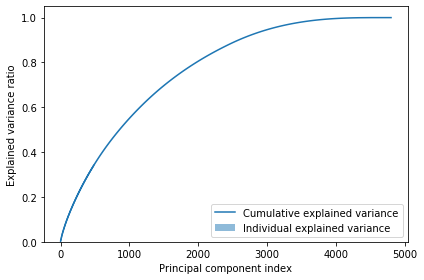

In [92]:
#!c1.32
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

CATBOOST USING TF_I_DF

In [100]:
#!c1.32
df = pd.read_parquet('/home/jupyter/mnt/s3/hsedatafitpredict1392/mega_train.parquet')

FEATURE ENGINEERING FOR CATBOOST MODEL

In [101]:
#!c1.32
#!c1.32
ot = []

def count_(x):
    digit = 0
    letters = 0
    space = 0
    punctuation = 0
    quotes = 0
    brackets = 0
    money = 0
    other = 0
    exclamation = 0
    question = 0
    smile = 0
    for i in x:
        if i.isalpha():
            letters += 1
        elif i.isnumeric():
            digit += 1
        elif i.isspace():
            space += 1
        elif i in '''‚Äú‚Äù"'`¬´¬ª><''':
            quotes += 1
        elif (i in '''‚Ä¶.,\n:;‚Äì''') or i == '‚Äî':
            punctuation += 1
        elif i in '''|[]{}()''':
            brackets += 1
        elif i in '''%~‚ÇΩ&‚Ññ$=+-*#''':
            money += 1
        elif i in ('ü§©', 'üëç'):
            smile += 1
        elif i in '‚ùó!':
            exclamation +1
        elif i in '?':
            question += 1
        else:
            other += 1
            if i not in ot:
                ot.append(i)
    return [digit, letters, space, quotes, punctuation, brackets, money, smile, exclamation, question, other]

In [102]:
#!c1.32
df['temp'] = df.sentence.apply(lambda x: count_(x))
df.loc[:,'number'] = df.loc[:,'temp'].apply(lambda x: x[0])
df.loc[:,'alpha'] = df.loc[:,'temp'].apply(lambda x: x[1])
df.loc[:,'space'] = df.loc[:,'temp'].apply(lambda x: x[2])
df.loc[:,'quotes'] = df.loc[:,'temp'].apply(lambda x: x[3])
df.loc[:,'punctuation'] = df.loc[:,'temp'].apply(lambda x: x[4])
df.loc[:,'brackets'] = df.loc[:,'temp'].apply(lambda x: x[5])
df.loc[:,'money'] = df.loc[:,'temp'].apply(lambda x: x[6])
df.loc[:,'smile'] = df.loc[:,'temp'].apply(lambda x: x[7])
df['thumb'] = df.sentence.apply(lambda x: x.count('üëç'))
df.loc[:,'exclamation'] = df.loc[:,'temp'].apply(lambda x: x[8])
df.loc[:,'question'] = df.loc[:,'temp'].apply(lambda x: x[9])
df.loc[:,'other'] = df.loc[:,'temp'].apply(lambda x: x[-1])

df.drop('temp', axis=1, inplace=True)

In [103]:
#!c1.32
#!c1.32
df['sentence_f'] = df.sentence
def only_char_left(text):
    text_new = ''
    for i in text:
        if i.isalpha() or i == ' ':
            text_new += i
    return text_new
        
    
df['sentence_f'] = df['sentence_f'].apply(lambda x: only_char_left(x))
df['sentence_f'] = df['sentence_f'].apply(lambda x: ' '.join(x.lower().split(' ')))
df['word_qty'] = df['sentence_f'].apply(lambda x: len(x.split()))

In [104]:
#!c1.32
df_filtered = df[['sentence_f', 'word_qty',
                  'number', 'alpha', 'space', 'quotes', 
                  'punctuation', 'exclamation', 'question', 
                  'brackets', 'money', 'smile', 'thumb', 'other',
                  'communication', 'price', 'quality', 'safety', 'y']]



df_filtered.rename(columns={'sentence_f':'sentence',
                            'y': 'sentiment'
                           })
df_filtered

sentence_f  word_qty  ...  safety  y
0        —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –≤—ã—Ä–∞–∑–∏—Ç—å –æ–≥—Ä–æ–º–Ω—É—é –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å...        17  ...     0.0  1
1      –Ω–∞ —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∏–ª–∞ –º–Ω–µ —á—Ç–æ –¥–∞–Ω–Ω—É...        13  ...     0.0 -1
2      —Ç–µ–º —Å–∞–º—ã–º –æ—Å—Ç–∞–≤–∏–≤ –º–µ–Ω—è –±–µ–∑ —Å—Ä–µ–¥—Å—Ç–≤ –∫ —Å—É—â–µ—Å—Ç–≤–æ...        16  ...     0.0 -1
3      –Ω–æ—è–±—Ä—è —Å–µ–≥–æ –≥–æ–¥–∞ —è –æ–±—Ä–∞—â–∞—é—Å—å –∫ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä—É...        13  ...     0.0  0
4      –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–ª–∏ —Å—á–µ—Ç —è–∫–æ–±—ã –∏–∑–∑–∞ –ø—Ä–æ—Å—Ä–æ—á–µ–Ω–æ–π –∑–∞–¥...        27  ...     0.0 -1
...                                                 ...       ...  ...     ... ..
7161  —è —Å–≤–æ–µ–≤—Ä–µ–º–µ–Ω–Ω–æ –∏ –≤ –ø–æ–ª–Ω–æ–º –æ–±—ä–µ–º–µ –∏—Å–ø–æ–ª–Ω—è–ª –≤—Å–µ ...        10  ...     0.0  0
7162  —è —É —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞ —Å–ø—Ä–æ—Å–∏–ª–∞ –ø–æ–ª—É—á–∏–ª–∞ –æ—Ç–≤–µ—Ç –Ω–æ —Å–æ—Ç—Ä...        12  ...     1.0 -1
7163   –≤–æ—Å—Ö–∏—â–∞—é—Å—å —è –ø—Ä–æ—Ö–æ–¥–∏—Ç –µ—â–µ –Ω–µ–¥–µ–ª—è –Ω—É —è –¥—É–º–∞—é –∏...        45  ...     0.0  0
7164  –≤—ã —Å–≤–æ–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å–æ–≤—Å–µ–º –Ω–µ —É–≤–∞–∂–∞–µ—Ç–µ —Å—á–∏—Ç–∞—è –∏—Ö...        15  ...     0.0 -1
7165   –¥–æ —Ñ –æ—Ç  –∏ —Ç–∞–∫–∂–µ –≤ —Ç–æ—Ç –∂–µ –¥–µ–Ω—å —á–µ—Ä–µ–∑ –ª–∏—á–Ω—ã–π –∫...        15  ...     0.0  0

[7166 rows x 19 columns]

In [105]:
#!c1.32
#!c1.32
#df_filtered.to_csv('/home/jupyter/mnt/s3/hsedatafitpredict1392/filtered_train_with_features.csv')

In [109]:
#!c1.32
pca_df.head()

var1      var2      var3  ...    var298    var299    var300
0  0.028439  0.081455  0.014646  ...  0.020328 -0.006606 -0.005083
1  0.054838  0.082062 -0.054840  ...  0.055696 -0.012126  0.018844
2 -0.041202 -0.015547 -0.000728  ... -0.003005 -0.017283  0.032062
3 -0.036412 -0.011801 -0.011671  ... -0.041933  0.076487 -0.013059
4 -0.052176 -0.020029 -0.048848  ... -0.001630 -0.013323 -0.024540

[5 rows x 300 columns]

In [111]:
#!c1.32
#!c1.32
df_1 = pca_df

In [112]:
#!c1.32
df_big = pd.concat([df_1, df_filtered], axis=1)
# df_big.drop(['sentence', 'communication', 'price', 'quality', 'safety', 'not_def',
#        'sentiment', 'without_punct', 'without_stopwords', 'lemmatized', 'sentence_f'], axis=1, inplace=True)
df_big.drop(['sentence_f'], axis=1, inplace=True)
df_big

var1      var2      var3      var4  ...  price  quality  safety  y
0     0.028439  0.081455  0.014646 -0.034765  ...    0.0      3.0     0.0  1
1     0.054838  0.082062 -0.054840 -0.061896  ...    0.0      0.0     0.0 -1
2    -0.041202 -0.015547 -0.000728 -0.005007  ...    0.0      1.0     0.0 -1
3    -0.036412 -0.011801 -0.011671 -0.004535  ...    0.0      0.0     0.0  0
4    -0.052176 -0.020029 -0.048848 -0.030553  ...    0.0      0.0     0.0 -1
...        ...       ...       ...       ...  ...    ...      ...     ... ..
7161 -0.071765 -0.038300  0.004433  0.035485  ...    0.0      0.0     0.0  0
7162 -0.016774  0.016380  0.053488 -0.071024  ...    0.0      0.0     1.0 -1
7163 -0.077628 -0.042521  0.001417 -0.017934  ...    0.0      0.0     0.0  0
7164  0.145687 -0.123531  0.061884  0.009763  ...    1.0      1.0     0.0 -1
7165 -0.068618 -0.032150  0.008552 -0.003316  ...    0.0      0.0     0.0  0

[7166 rows x 318 columns]

In [113]:
#!c1.32
df_y = df_big['y'].copy()
df_X = df_big.copy()
df_X.drop('y', axis=1, inplace=True)

In [116]:
#!c1.32
#!c1.32
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

rf1_2 = CatBoostClassifier(learning_rate=0.055, 
                          n_estimators=1000, 
                          subsample=0.075, 
                          max_depth=5, 
                          verbose=250,
                          l2_leaf_reg = 7,
                          bootstrap_type="Bernoulli",
                          class_weights=[1, 1, 1],
                          loss_function='MultiClass')
#                           eval_metric='F1')

kf = StratifiedKFold(n_splits=7,shuffle=True,random_state=99)
ra = []

for fold,(t_id,v_id) in enumerate(kf.split(df_X,df_y)):
    tx = df_X.iloc[t_id]; ty = df_y.iloc[t_id]
    vx = df_X.iloc[v_id]; vy = df_y.iloc[v_id]
    rf1_2.fit(tx,ty)        
    val_y = rf1_2.predict(vx)
    prob_val_y = rf1_2.predict_proba(vx)

    roc_auc = roc_auc_score(vy, prob_val_y, multi_class='ovr')
    ra.append(roc_auc)
    print('-------------')
    
print(f"Mean roc auc score {np.mean(ra)}")

0:	learn: 1.0822039	total: 70.4ms	remaining: 1m 10s
250:	learn: 0.6057773	total: 2.7s	remaining: 8.06s
500:	learn: 0.4936793	total: 5.22s	remaining: 5.2s
750:	learn: 0.4200444	total: 7.86s	remaining: 2.61s
999:	learn: 0.3665224	total: 10.7s	remaining: 0us
-------------
0:	learn: 1.0868902	total: 20ms	remaining: 20s
250:	learn: 0.5948003	total: 3.19s	remaining: 9.52s
500:	learn: 0.4847017	total: 6.13s	remaining: 6.11s
750:	learn: 0.4142807	total: 8.96s	remaining: 2.97s
999:	learn: 0.3614742	total: 11.9s	remaining: 0us
-------------
0:	learn: 1.0824006	total: 18ms	remaining: 18s
250:	learn: 0.6001863	total: 3.23s	remaining: 9.63s
500:	learn: 0.4871335	total: 6.27s	remaining: 6.24s
750:	learn: 0.4124326	total: 9.11s	remaining: 3.02s
999:	learn: 0.3573478	total: 12.1s	remaining: 0us
-------------
0:	learn: 1.0796594	total: 12.9ms	remaining: 12.9s
250:	learn: 0.6013551	total: 3.25s	remaining: 9.7s
500:	learn: 0.4816502	total: 6.36s	remaining: 6.34s
750:	learn: 0.4106513	total: 9.41s	remaini

CATBOOST USING TF_I_DF

In [128]:
#!c1.32
model_cache_path = Path('./model_cache')
model_cache_path.mkdir(parents=True, exist_ok=True)

base_model_name = "cointegrated/rubert-tiny"

In [129]:
#!c1.32
trained_model_path = Path('./trained_model_artifacts')
trained_model_path.mkdir(parents=True, exist_ok=True)

In [130]:
#!c1.32
train_df = pd.read_parquet('../../mnt/s3/hsedatafitpredict1392/mega_train.parquet')

In [131]:
#!c1.32
tokenizer = transformers.BertTokenizer.from_pretrained(base_model_name, cache_dir = model_cache_path)
base_rubert = BertModel.from_pretrained(base_model_name, cache_dir = model_cache_path)

Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [132]:
#!c1.32
def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

In [134]:
#!c1.32
embeddings = {}
for count, sentence in enumerate(train_df.sentence):
    embeddings[count] = embed_bert_cls(sentence, base_rubert, tokenizer)

In [135]:
#!c1.32
emb_df = pd.DataFrame(embeddings).T

In [136]:
#!c1.32
train_emb_df = pd.concat([train_df, emb_df], axis = 1)
train_emb_df.columns = [str(i) for i in train_emb_df.columns]

In [ ]:
#!c1.32
#train_emb_df.to_parquet('../../mnt/s3/hsedatafitpredict1392/catboost/mega_train_embeddings_bert.parquet')

In [137]:
#!c1.32
train_emb_df

sentence  ...       311
0      10.12.2020 20:57 –•–æ—Ç–µ–ª–æ—Å—å –±—ã –≤—ã—Ä–∞–∑–∏—Ç—å –æ–≥—Ä–æ–º–Ω—É...  ... -0.087500
1     !, –Ω–∞ —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∏–ª–∞ –º–Ω–µ —á—Ç–æ –¥–∞–Ω...  ... -0.149410
2     !, —Ç–µ–º —Å–∞–º—ã–º –æ—Å—Ç–∞–≤–∏–≤ –º–µ–Ω—è –±–µ–∑ —Å—Ä–µ–¥—Å—Ç–≤ –∫ —Å—É—â–µ—Å—Ç...  ... -0.047402
3     !16 –Ω–æ—è–±—Ä—è —Å–µ–≥–æ –≥–æ–¥–∞ —è –æ–±—Ä–∞—â–∞—é—Å—å –∫ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç...  ... -0.049013
4     !22.02.2020 –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–ª–∏ —Å—á–µ—Ç —è–∫–æ–±—ã –∏–∑-–∑–∞ –ø—Ä–æ...  ... -0.024872
...                                                 ...  ...       ...
7161  —è —Å–≤–æ–µ–≤—Ä–µ–º–µ–Ω–Ω–æ –∏ –≤ –ø–æ–ª–Ω–æ–º –æ–±—ä–µ–º–µ –∏—Å–ø–æ–ª–Ω—è–ª –í–°–ï ...  ... -0.058037
7162  —è —É —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞ —Å–ø—Ä–æ—Å–∏–ª–∞- –ø–æ–ª—É—á–∏–ª–∞ –æ—Ç–≤–µ—Ç. –Ω–æ —Å–æ...  ... -0.086117
7163  ‚Äì –≤–æ—Å—Ö–∏—â–∞—é—Å—å —è. –ü—Ä–æ—Ö–æ–¥–∏—Ç –µ—â–µ –Ω–µ–¥–µ–ª—è... –ù—É, —è –¥...  ... -0.050143
7164  ‚Ä¶–í—ã —Å–≤–æ–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å–æ–≤—Å–µ–º –Ω–µ —É–≤–∞–∂–∞–µ—Ç–µ, —Å—á–∏—Ç–∞—è ...  ... -0.050448
7165  ‚Ññ –î–û 53/–§20-04-07/1333 –æ—Ç 19.09.2018 –∏ —Ç–∞–∫–∂–µ –≤...  ... -0.036024

[7166 rows x 320 columns]

In [138]:
#!c1.32
df_n = train_emb_df
df_n.drop(['sentence', 'communication', 'price', 'quality', 'safety', 'not_def', 'sentiment', 'y'], axis=1, inplace=True)
df_n

0         1         2  ...       309       310       311
0     0.095926  0.027878 -0.058136  ... -0.040051  0.060394 -0.087500
1    -0.048135 -0.042267 -0.086132  ... -0.077632  0.038530 -0.149410
2     0.037359  0.028186 -0.063541  ... -0.033408  0.080519 -0.047402
3     0.088608 -0.028121 -0.050769  ...  0.039786  0.052765 -0.049013
4     0.074634 -0.038165 -0.051844  ... -0.019496  0.057952 -0.024872
...        ...       ...       ...  ...       ...       ...       ...
7161 -0.007624 -0.047991 -0.080857  ... -0.076367  0.125942 -0.058037
7162 -0.062842 -0.006533 -0.031847  ... -0.065888  0.009876 -0.086117
7163  0.034727  0.086619 -0.021236  ... -0.079540  0.010876 -0.050143
7164  0.066426 -0.021138 -0.002209  ... -0.084253 -0.000002 -0.050448
7165  0.035523  0.038080  0.015140  ... -0.062911  0.080224 -0.036024

[7166 rows x 312 columns]

In [139]:
#!c1.32
dataframe_n = pd.concat([df_n, df_filtered], axis=1)
dataframe_n

0         1         2         3  ...  price  quality  safety  y
0     0.095926  0.027878 -0.058136 -0.016623  ...    0.0      3.0     0.0  1
1    -0.048135 -0.042267 -0.086132 -0.014711  ...    0.0      0.0     0.0 -1
2     0.037359  0.028186 -0.063541 -0.094592  ...    0.0      1.0     0.0 -1
3     0.088608 -0.028121 -0.050769 -0.047755  ...    0.0      0.0     0.0  0
4     0.074634 -0.038165 -0.051844 -0.015446  ...    0.0      0.0     0.0 -1
...        ...       ...       ...       ...  ...    ...      ...     ... ..
7161 -0.007624 -0.047991 -0.080857 -0.019912  ...    0.0      0.0     0.0  0
7162 -0.062842 -0.006533 -0.031847 -0.020214  ...    0.0      0.0     1.0 -1
7163  0.034727  0.086619 -0.021236 -0.018119  ...    0.0      0.0     0.0  0
7164  0.066426 -0.021138 -0.002209 -0.071995  ...    1.0      1.0     0.0 -1
7165  0.035523  0.038080  0.015140 -0.016161  ...    0.0      0.0     0.0  0

[7166 rows x 331 columns]

In [140]:
#!c1.32
df_y = dataframe_n['y'].copy()
df_X = dataframe_n.drop(['y', 'sentence_f'], axis=1).copy()
df_X

0         1         2  ...  price  quality  safety
0     0.095926  0.027878 -0.058136  ...    0.0      3.0     0.0
1    -0.048135 -0.042267 -0.086132  ...    0.0      0.0     0.0
2     0.037359  0.028186 -0.063541  ...    0.0      1.0     0.0
3     0.088608 -0.028121 -0.050769  ...    0.0      0.0     0.0
4     0.074634 -0.038165 -0.051844  ...    0.0      0.0     0.0
...        ...       ...       ...  ...    ...      ...     ...
7161 -0.007624 -0.047991 -0.080857  ...    0.0      0.0     0.0
7162 -0.062842 -0.006533 -0.031847  ...    0.0      0.0     1.0
7163  0.034727  0.086619 -0.021236  ...    0.0      0.0     0.0
7164  0.066426 -0.021138 -0.002209  ...    1.0      1.0     0.0
7165  0.035523  0.038080  0.015140  ...    0.0      0.0     0.0

[7166 rows x 329 columns]

In [141]:
#!c1.32
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

rf1_2 = CatBoostClassifier(learning_rate=0.055, 
                          n_estimators=1000, 
                          subsample=0.075, 
                          max_depth=5, 
                          verbose=250,
                          l2_leaf_reg = 7,
                          bootstrap_type="Bernoulli",
                          class_weights=[1, 1, 1],
                          loss_function='MultiClass')
#                           eval_metric='F1')

kf = StratifiedKFold(n_splits=7,shuffle=True,random_state=99)
ra = []

for fold,(t_id,v_id) in enumerate(kf.split(df_X,df_y)):
    tx = df_X.iloc[t_id]; ty = df_y.iloc[t_id]
    vx = df_X.iloc[v_id]; vy = df_y.iloc[v_id]
    rf1_2.fit(tx,ty)        
    val_y = rf1_2.predict(vx)
    prob_val_y = rf1_2.predict_proba(vx)

    roc_auc = roc_auc_score(vy, prob_val_y, multi_class='ovr')
    ra.append(roc_auc)
    print('-------------')
    
print(f"Mean roc auc score {np.mean(ra)}")

0:	learn: 1.0753098	total: 66.4ms	remaining: 1m 6s
250:	learn: 0.5269467	total: 3.29s	remaining: 9.83s
500:	learn: 0.4438269	total: 6.71s	remaining: 6.68s
750:	learn: 0.3948079	total: 10.4s	remaining: 3.45s
999:	learn: 0.3579804	total: 14.3s	remaining: 0us
-------------
0:	learn: 1.0756357	total: 14.3ms	remaining: 14.3s
250:	learn: 0.5213639	total: 3.14s	remaining: 9.37s
500:	learn: 0.4410354	total: 6.73s	remaining: 6.7s
750:	learn: 0.3905273	total: 10.2s	remaining: 3.4s
999:	learn: 0.3516655	total: 14.1s	remaining: 0us
-------------
0:	learn: 1.0782037	total: 30.9ms	remaining: 30.8s
250:	learn: 0.5267550	total: 3.27s	remaining: 9.76s
500:	learn: 0.4431482	total: 7.1s	remaining: 7.07s
750:	learn: 0.3926237	total: 10.8s	remaining: 3.58s
999:	learn: 0.3552995	total: 14s	remaining: 0us
-------------
0:	learn: 1.0771090	total: 24.1ms	remaining: 24.1s
250:	learn: 0.5185836	total: 3.66s	remaining: 10.9s
500:	learn: 0.4360338	total: 6.86s	remaining: 6.83s
750:	learn: 0.3898318	total: 9.91s	re

In [ ]:
#!c1.32
